In [1]:
%matplotlib inline
%config Inline.figure_format = 'retina'

import numpy as np
import torch
#import helper
import matplotlib.pyplot as plt

In [3]:
from torchvision import datasets, transforms
from torch import nn, optim

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('MNIST_data/', download=True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


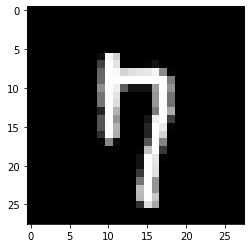

In [5]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [7]:
images.shape

torch.Size([64, 1, 28, 28])

In [6]:
input_size = 784
hidden_size = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_size[0]),nn.ReLU(),
                      nn.Linear(hidden_size[0], hidden_size[1]), nn.ReLU(),
                      nn.Linear(hidden_size[1], output_size),nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [10]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
image = images.view(images.shape[0], -1)

pred = model(image)
loss = criterion(pred, labels)

In [13]:
optimizer = optim.SGD(model.parameters(), lr =0.003, momentum = 0.9)

epochs = 15

for e in range(epochs):
    current_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        current_loss = current_loss + loss.item()
    else:
        print("Epoch{} - Training Loss{}" .format(e, current_loss/len(trainloader)))
        
            

Epoch0 - Training Loss0.6892868711877225
Epoch1 - Training Loss0.27938626992152826
Epoch2 - Training Loss0.21416932855571894
Epoch3 - Training Loss0.1709390787749307
Epoch4 - Training Loss0.14329345339833738
Epoch5 - Training Loss0.12409731965345233
Epoch6 - Training Loss0.10792798657359472
Epoch7 - Training Loss0.09517359849252204
Epoch8 - Training Loss0.08668251538863664
Epoch9 - Training Loss0.07918946385018226
Epoch10 - Training Loss0.07247496339659304
Epoch11 - Training Loss0.06509328345164482
Epoch12 - Training Loss0.05997274149068272
Epoch13 - Training Loss0.05676031393681103
Epoch14 - Training Loss0.05032889743738655


In [ ]:
correct, total = 0, 0
for images, labels in val